In [1]:
import h5py as h5
import torch
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from ipdb import set_trace
from torch.utils.data import DataLoader as dl
from torch.utils.data import Dataset as ds
from torch import nn
%matplotlib inline

### Dataset

In [2]:
BATCH_SIZE = 5
NUM_EPOCHS = 1
index = 0
class MNIST_3D_DS(ds):
    def __init__(self, data):
        self.data = data
    def __getitem__(self, ind):
        return self.data[ind]
    def __len__(self):
        return len(self.data)
with h5.File('../../../239_748156_bundle_archive/train_point_clouds.h5', 'r') as hf:
    train_set = dl(MNIST_3D_DS([torch.Tensor(x['img']) for x in hf.values()]), batch_size=BATCH_SIZE)

with h5.File('../../../239_748156_bundle_archive/test_point_clouds.h5', 'r') as hf:
    test_set = dl(MNIST_3D_DS([torch.Tensor(x['img']) for x in hf.values()]), batch_size=BATCH_SIZE)


### Viz_tools

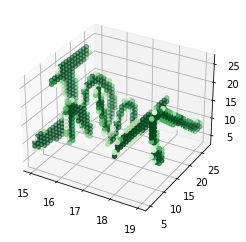

(5, 30, 30)

In [3]:
img_lst = list(Img for i, Img in enumerate(train_set))
img = img_lst[100].numpy()

# build voxel data
xdata = np.array([ i + img.shape[1]/2 for i in range(len(img)) for j in range(img.shape[1] * img.shape[2])])
ydata = np.array([ j for i in range(len(img)) for j in range(img.shape[1]) for k in range(img.shape[2])])
zdata = np.array([ k for i in range(len(img)) for j in range(img.shape[1]) for k in range(img.shape[2])])
cdata = np.array([ img[i,j,k] for i in range(len(img)) for j in range(img.shape[1]) for k in range(img.shape[2])])

# remove white space for transparency 
rm_list = [i for i in range(len(cdata)) if cdata[i] < 0.3 ]
xdata = np.delete(xdata, rm_list)
ydata = np.delete(ydata, rm_list)
zdata = np.delete(zdata, rm_list)
cdata = np.delete(cdata, rm_list)

# stretch the graph for equal-scale aspect
# xdata = np.insert(xdata, len(xdata), [0, 30])
# ydata = np.insert(ydata, len(ydata), [0, 30])
# zdata = np.insert(zdata, len(zdata), [0, 30])
# cdata = np.insert(cdata, len(cdata), [0, 0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='Greens')
plt.show()
img.shape

### Model

In [ ]:
class D(nn.Module):
    def __init__(self, n_channels, n_class=1):
        super(D, self).__init__()
        self.conv1 = nn.Conv3d(1, n_channels // 8, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv3d(n_channels // 8, n_channels // 4, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv3d(n_channels // 4, n_channels, kernel_size=4, stride=2, padding=1)
        self.conv4 = nn.Conv3d(n_channels, n_class, kernel_size=4, stride=2, padding=0)


In [ ]:
while index < len(train_set):
    index += 1
len(test_set)

In [ ]:
%debug